# Qualitative Analysis
In this notebook, I have decided to take a more qualitative approach to analyzing the failure of NN's to relate the two vector spaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, metrics, preprocessing, cluster

# Load Data
data = np.load('data/data_w_labels.npz')
Bdata = data['vec']     # Binder Word Vectors
Gdata = data['gVec']    # Google word Vectors
L1 = data['L1']         # Super Category labels
L2 = data['L2']         # Category labels

# Use t-SNE to decompose to 2 dim
B_red = manifold.TSNE(n_components=2, random_state=0).fit_transform(Bdata)
G_red = manifold.TSNE(n_components=2, random_state=20, early_exaggeration=10).fit_transform(Gdata)

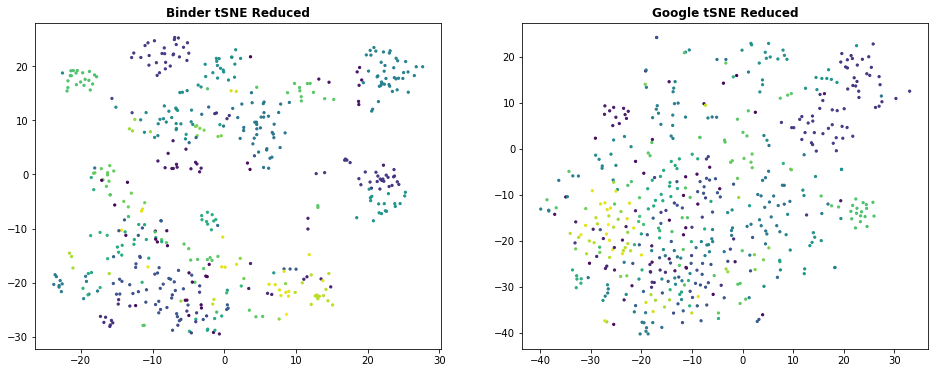

In [2]:
# Scatter the two embeddings
plt.figure(1, figsize=(16,6))
plt.subplot(121)
plt.scatter(B_red[:,0], B_red[:,1], s=5, c=L2)
plt.title('Binder tSNE Reduced', fontweight='bold')
plt.subplot(122)
plt.scatter(G_red[:,0], G_red[:,1], s=5, c=L2)
plt.title('Google tSNE Reduced', fontweight='bold')
plt.show()

### Notes
* I have tried different distance metrics. In general, the result was lack-luster and just the standard euclidean distance gives just as good results as other methods
* I also used the 'exact' method, and this actually led to worse results :/

In [3]:
# For general analysis, lets normalize the vectors
B_normed = preprocessing.normalize(Bdata, norm='l2')   # Binder Word Vectors
G_normed = preprocessing.normalize(Gdata, norm='l2')   # Google word Vectors

# Look at different measures of seperation
scB  = metrics.silhouette_score(B_normed, L2)
scG  = metrics.silhouette_score(G_normed, L2)
chsB = metrics.calinski_harabaz_score(B_normed, L2)
chsG = metrics.calinski_harabaz_score(G_normed, L2)
print( 'Silhouette Score: \t Binder ', scB, ' \t Google ', scG)
print( 'Harabaz Score: \t \t Binder', chsB, ' \t \t Google: ', chsG)

Silhouette Score: 	 Binder  0.0524121034586  	 Google  0.012055196124
Harabaz Score: 	 	 Binder 18.6104234596  	 	 Google:  3.47564570706


Note, the higher the score, the better the result. Also, I tried this with normalization and the results were a little better. However, the motivation for normalization is not completely clear

In [4]:
# Lets look at if the natural clusters correspond to the natural clusters
estB = cluster.KMeans(n_clusters=int(max(L2))).fit(Bdata)
estG = cluster.KMeans(n_clusters=int(max(L2))).fit(Gdata)
Bapp = metrics.adjusted_rand_score(L2, estB.labels_)
Gapp = metrics.adjusted_rand_score(L2, estG.labels_)
print(Bapp, '     ', Gapp)


0.434597125565       0.259563664665


## Lets look at which which clusters are the  worst

In [5]:
# Calculate Centroids and total distances (L2)
B_centroids = np.zeros((47,65))
B_cDist = np.zeros((47,))
for label in range(47):
    B_centroids[label] = np.mean(Bdata[L2==label], axis=0)
for idx, row in enumerate(Bdata):
    B_cDist[int(L2[idx])] = B_cDist[int(L2[idx])] + np.linalg.norm(row - B_centroids[int(L2[idx])])

G_centroids = np.zeros((47,300))
G_cDist = np.zeros((47,))
for label in range(47):
    G_centroids[label] = np.mean(Gdata[L2==label], axis=0)
for idx, row in enumerate(Gdata):
    G_cDist[int(L2[idx])] = G_cDist[int(L2[idx])] + np.linalg.norm(row - G_centroids[int(L2[idx])])

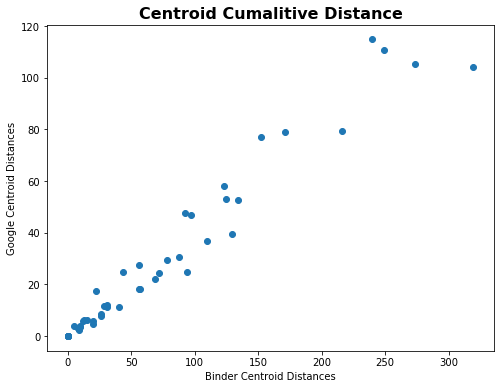

In [6]:
# Scatter
plt.figure(figsize=(8,6))
plt.scatter(B_cDist, G_cDist)
plt.title('Centroid Cumalitive Distance',fontweight='bold', fontsize=16)
plt.xlabel('Binder Centroid Distances')
plt.ylabel('Google Centroid Distances')
plt.show()

In [7]:
# np.savez('cDistances', B_cDist=B_cDist, G_cDist = G_cDist)

## Detailed Plots
This section is just to make plots with varying labels

In [8]:
from lib import funcs
# Load Labels
Scats = data['Scats']
cats = data['cats']
kmeans = data['kmeans']
wordType = data['typeL']
# Load other values
L3 = data['L3']
L4 = data['L4']

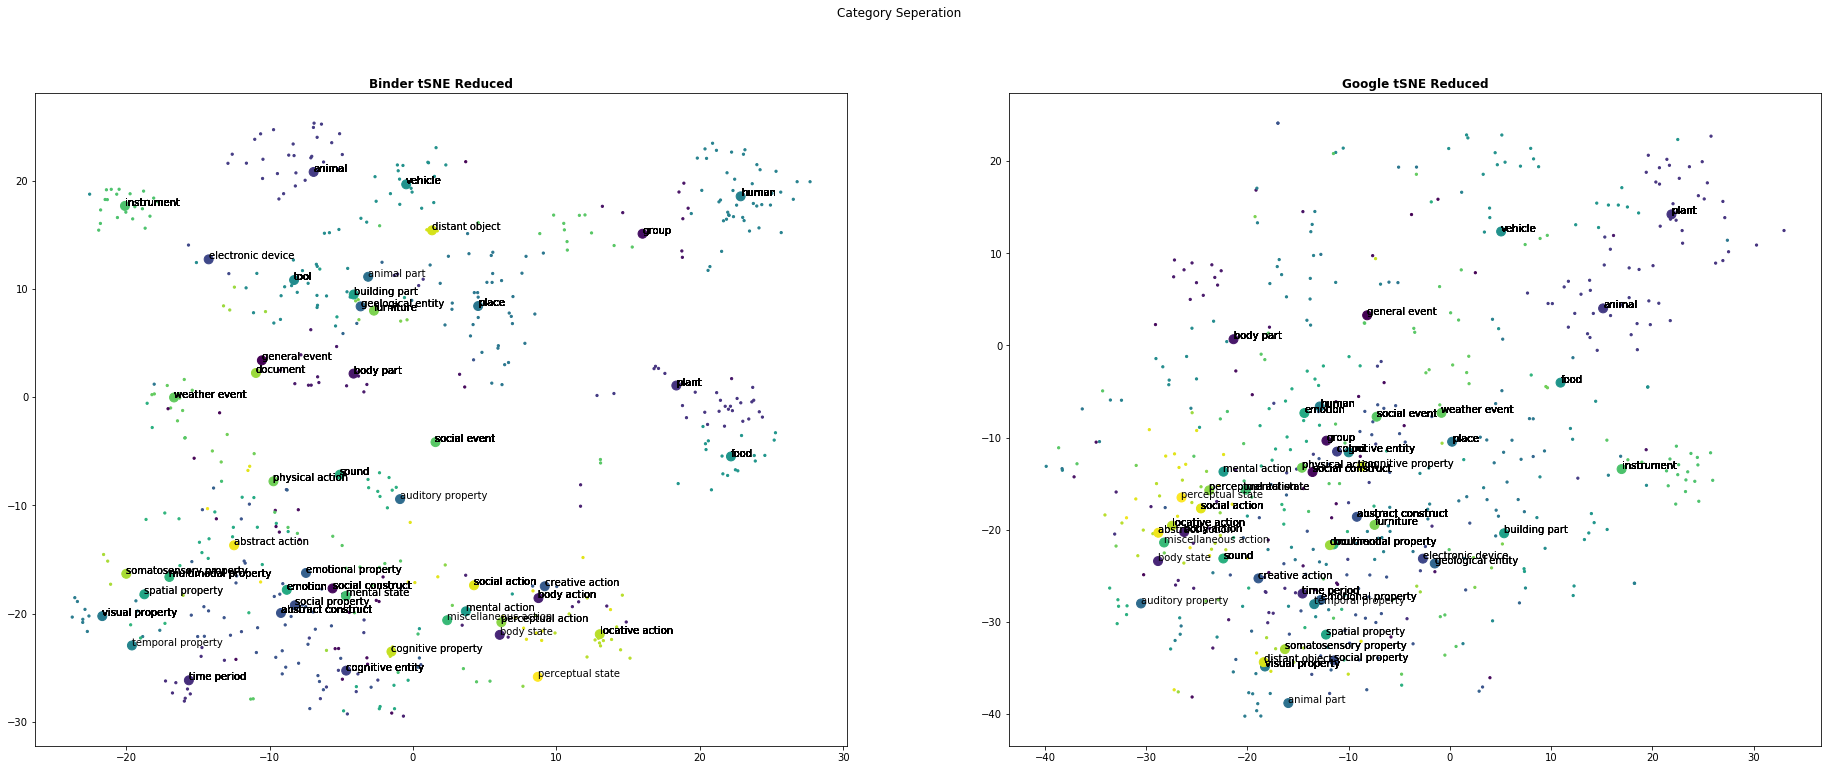

In [9]:
funcs.labeled_plot(B_red, G_red, L2, cats,'Category Seperation', 'category_labels.png')

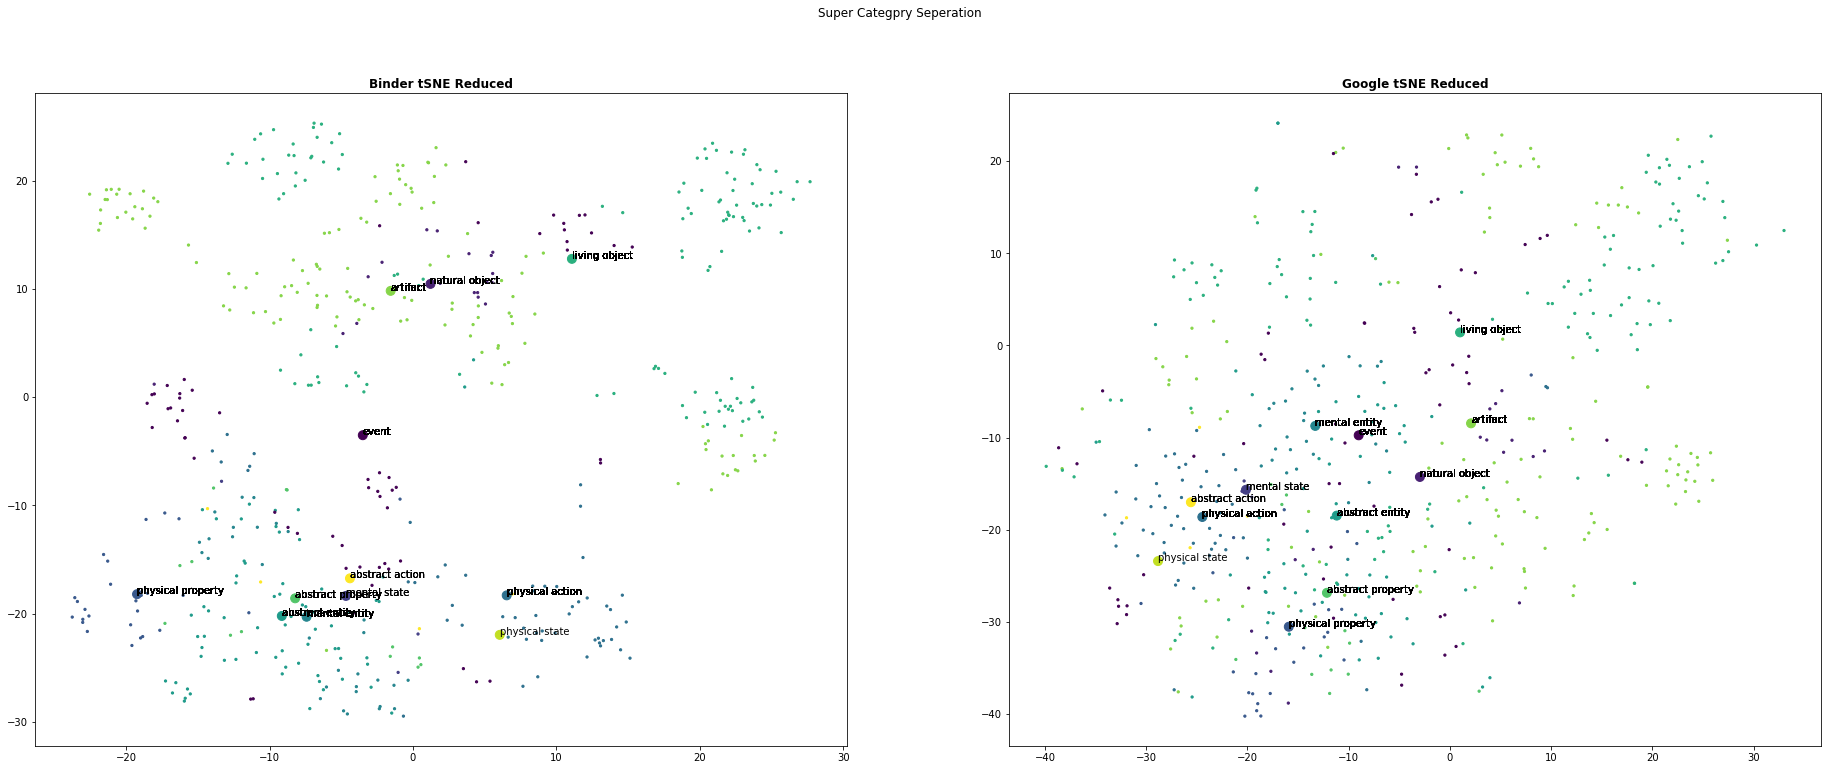

In [10]:
funcs.labeled_plot(B_red, G_red, L1, Scats,'Super Categpry Seperation', 'super_cats.png')

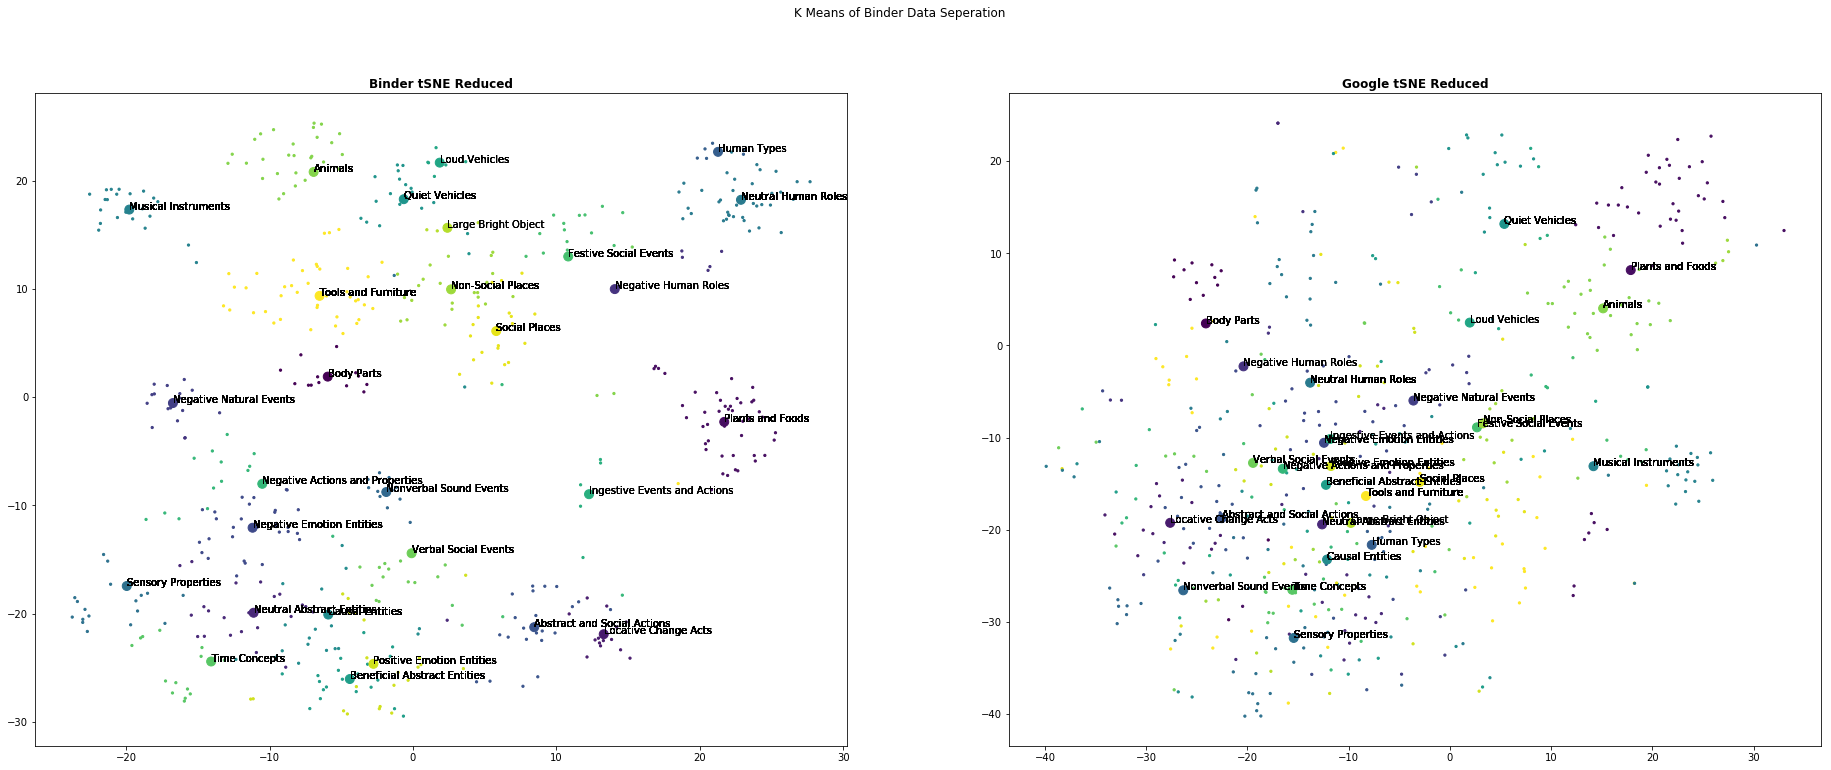

In [11]:
funcs.labeled_plot(B_red, G_red, L3, kmeans,'K Means of Binder Data Seperation', 'kmeans_sep.png')

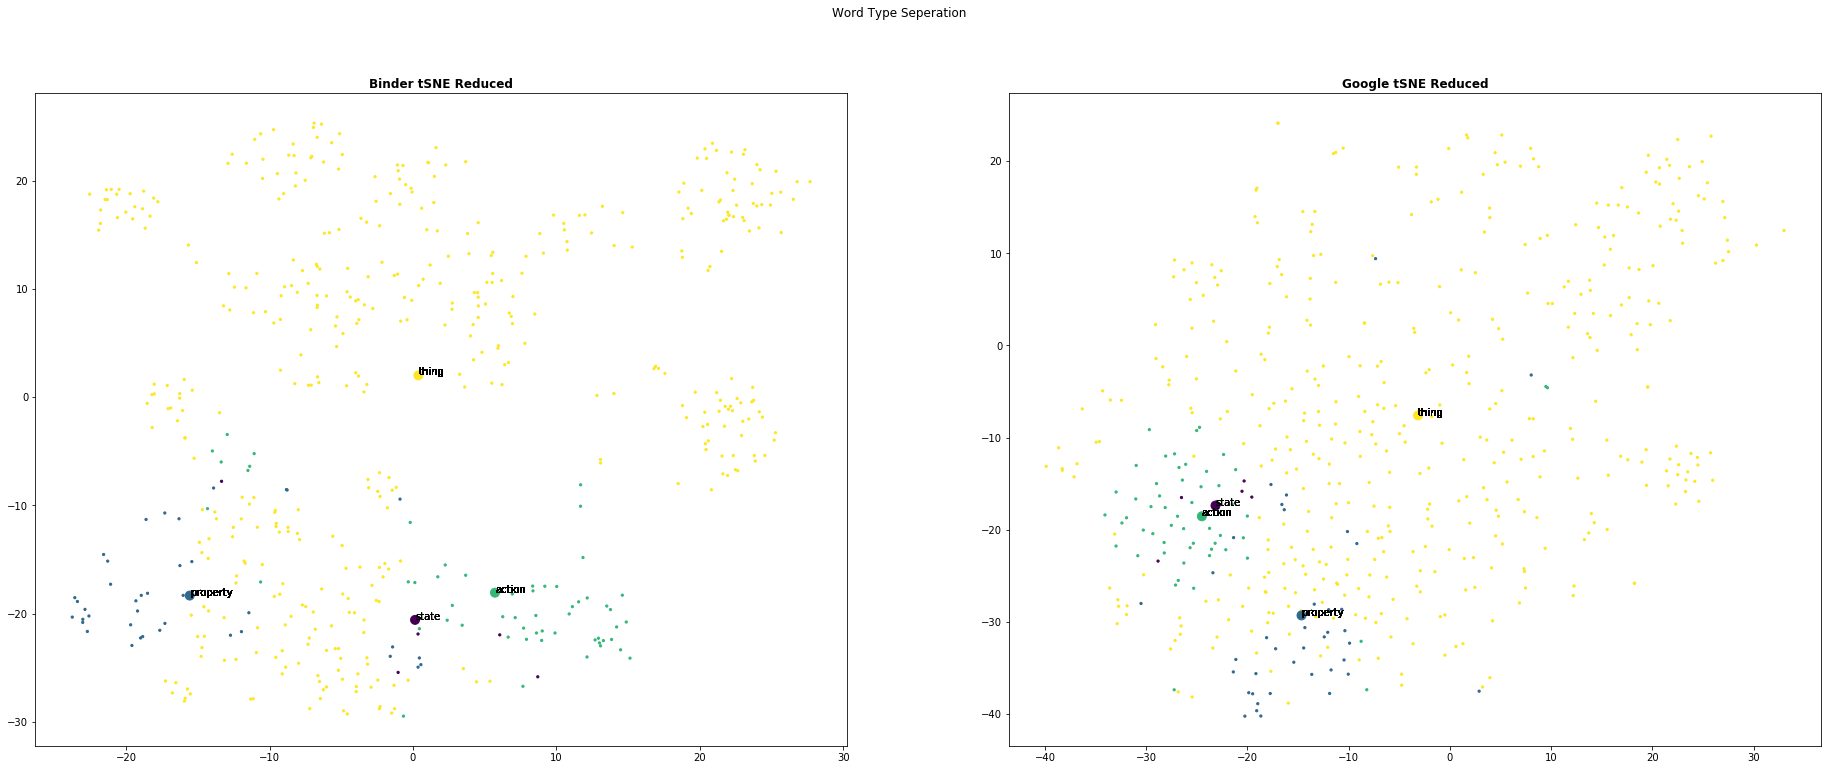

In [12]:
funcs.labeled_plot(B_red, G_red, L4, wordType,'Word Type Seperation', 'wordType_sep.png')